In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import AutoMinorLocator
import datetime as dt
import numpy as np
import gc

In [2]:
df = pd.read_csv('pg_view_tag_breakdown.csv')
del df['Unnamed: 0']
df_perc = pd.DataFrame(columns=['timestamp','action','christmas','halloween','horror'])
df.head()

,timestamp,pg_views,rolling_avg,pg_view_action,pg_view_christmas,pg_view_halloween,pg_view_valentine,pg_view_comedy,pg_view_romance,horror
0,2006-11-29 15:42:00,157,NaN,36,0,1,0,27,26,8
1,2006-11-30 15:42:00,92,NaN,37,0,0,0,32,15,9
2,2006-12-01 15:42:00,87,112.000000,22,0,0,0,17,9,5
3,2006-12-02 15:42:00,135,104.666667,25,4,0,0,26,15,6
4,2006-12-03 15:42:00,213,145.000000,96,1,1,0,61,37,17


In [3]:
df_perc['timestamp'] = df['timestamp']
df_perc['action'] = df['pg_view_action']/(df['pg_views']+0.1)*100
df_perc['christmas'] = df['pg_view_christmas']/(df['pg_views']+0.1)*100
df_perc['halloween'] = df['pg_view_halloween']/(df['pg_views']+0.1)*100
df_perc['comedy'] = df['pg_view_comedy']/(df['pg_views']+0.1)*100
df_perc['romance'] = df['pg_view_romance']/(df['pg_views']+0.1)*100
df_perc['horror'] = df['horror']/(df['pg_views']+0.1)*100
df_perc.head()
df_perc.to_csv('pg_view_tag_perc_breakdown.csv')

In [4]:
avg_action_p = df_perc['action'].sum()/(df_perc.shape[0]+1) 
avg_christmas_p = df_perc['christmas'].sum()/(df_perc.shape[0]+1)
avg_halloween_p = df_perc['halloween'].sum()/(df_perc.shape[0]+1) 
avg_comedy_p = df_perc['comedy'].sum()/(df_perc.shape[0]+1) 
avg_romamce_p = df_perc['romance'].sum()/(df_perc.shape[0]+1) 
avg_horror_p = df_perc['horror'].sum()/(df_perc.shape[0]+1) 


df_perc_avg = pd.DataFrame(columns=['timestamp','action','christmas','halloween'])
df_perc_avg['action'] = df_perc['action'] / avg_action_p
df_perc_avg['christmas'] = df_perc['christmas'] / avg_christmas_p
df_perc_avg['halloween'] = df_perc['halloween'] / avg_halloween_p
df_perc_avg['comedy'] = df_perc['comedy'] / avg_comedy_p
df_perc_avg['romance'] = df_perc['romance'] / avg_romamce_p
df_perc_avg['horror'] = df_perc['horror'] / avg_horror_p
df_perc_avg['timestamp'] = df['timestamp'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

df_perc_avg_s = pd.DataFrame(columns=['timestamp','action','christmas','halloween'])
df_perc_avg_s['action'] = df_perc['action'] - avg_action_p
df_perc_avg_s['christmas'] = df_perc['christmas'] - avg_christmas_p
df_perc_avg_s['halloween'] = df_perc['halloween'] - avg_halloween_p
df_perc_avg_s['comedy'] = df_perc['comedy'] - avg_comedy_p
df_perc_avg_s['romance'] = df_perc['romance'] - avg_romamce_p
df_perc_avg_s['horror'] = df_perc['horror'] - avg_horror_p
df_perc_avg_s['timestamp'] = df_perc_avg['timestamp']
#df_perc_avg.dtypes


In [6]:
avg_action = df['pg_view_action'].sum()/(df.shape[0]+1) 
avg_christmas = df['pg_view_christmas'].sum()/(df_perc.shape[0]+1)
avg_halloween = df['pg_view_halloween'].sum()/(df_perc.shape[0]+1) 
avg_comedy= df['pg_view_comedy'].sum()/(df_perc.shape[0]+1) 
avg_romance = df['pg_view_romance'].sum()/(df_perc.shape[0]+1)
avg_horror = df['horror'].sum()/(df_perc.shape[0]+1)

df_avg = pd.DataFrame(columns=['timestamp','action','christmas','halloween'])
df_avg['action'] = df['pg_view_action'] - avg_action
df_avg['christmas'] = df['pg_view_christmas'] - avg_christmas
df_avg['halloween'] = df['pg_view_halloween'] - avg_halloween
df_avg['comedy'] = df['pg_view_comedy'] - avg_comedy
df_avg['romance'] = df['pg_view_romance'] - avg_romance
df_avg['horror'] = df['horror'] - avg_horror
df_avg['timestamp'] = df['timestamp'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

df_avg_d = pd.DataFrame(columns=['timestamp','action','christmas','halloween'])
df_avg_d['action'] = df['pg_view_action'] / avg_action
df_avg_d['christmas'] = df['pg_view_christmas'] / avg_christmas
df_avg_d['halloween'] = df['pg_view_halloween'] / avg_halloween
df_avg_d['comedy'] = df['pg_view_comedy'] / avg_comedy
df_avg_d['romance'] = df['pg_view_romance'] / avg_romance
df_avg_d['horror'] = df['horror'] / avg_horror
df_avg_d['timestamp'] = df_avg['timestamp']

In [7]:
w = 14
df_perc['action_ra'] = df_perc['action'].rolling(window=w, center= True).mean()
df_perc['christmas_ra'] = df_perc['christmas'].rolling(window=w, center= True).mean()
df_perc['halloween_ra'] = df_perc['halloween'].rolling(window=w, center= True).mean()
df_perc['comedy_ra'] = df_perc['comedy'].rolling(window=w, center= True).mean()
df_perc['horror_ra'] = df_perc['horror'].rolling(window=w, center= True).mean()
df_perc['romance_ra'] = df_perc['romance'].rolling(window=w, center= True).mean()

df_perc_avg['action_ra'] = df_perc_avg['action'].rolling(window=w, center= True).mean()
df_perc_avg['christmas_ra'] = df_perc_avg['christmas'].rolling(window=w, center= True).mean()
df_perc_avg['halloween_ra'] = df_perc_avg['halloween'].rolling(window=w, center= True).mean()
df_perc_avg['comedy_ra'] = df_perc_avg['comedy'].rolling(window=w, center= True).mean()
df_perc_avg['horror_ra'] = df_perc_avg['horror'].rolling(window=w, center= True).mean()
df_perc_avg['romance_ra'] = df_perc_avg['romance'].rolling(window=w, center= True).mean()

df_perc_avg_s['action_ra'] = df_perc_avg_s['action'].rolling(window=w, center= True).mean()
df_perc_avg_s['christmas_ra'] = df_perc_avg_s['christmas'].rolling(window=w, center= True).mean()
df_perc_avg_s['halloween_ra'] = df_perc_avg_s['halloween'].rolling(window=w, center= True).mean()
df_perc_avg_s['comedy_ra'] = df_perc_avg_s['comedy'].rolling(window=w, center= True).mean()
df_perc_avg_s['horror_ra'] = df_perc_avg_s['horror'].rolling(window=w, center= True).mean()
df_perc_avg_s['romance_ra'] = df_perc_avg_s['romance'].rolling(window=w, center= True).mean()

df_perc_avg.head()
df_perc_avg_s.head()

df_avg_d['action_ra'] = df_avg_d['action'].rolling(window=w).mean()
df_avg_d['christmas_ra'] = df_avg_d['christmas'].rolling(window=w).mean()
df_avg_d['halloween_ra'] = df_avg_d['halloween'].rolling(window=w).mean()
df_avg_d['comedy_ra'] = df_avg_d['comedy'].rolling(window=w).mean()
df_avg_d['horror_ra'] = df_avg_d['horror'].rolling(window=w).mean()
df_avg_d['romance_ra'] = df_avg_d['romance'].rolling(window=w).mean()

df_avg['action_ra'] = df_avg['action'].rolling(window=w).mean()
df_avg['christmas_ra'] = df_avg['christmas'].rolling(window=w).mean()
df_avg['halloween_ra'] = df_avg['halloween'].rolling(window=w).mean()
df_avg['comedy_ra'] = df_avg['comedy'].rolling(window=w).mean()
df_avg['horror_ra'] = df_avg['horror'].rolling(window=w).mean()
df_avg['romance_ra'] = df_avg['romance'].rolling(window=w).mean()
df_avg_d.head()
df_avg.head()

,timestamp,action,christmas,halloween,comedy,romance,horror,action_ra,christmas_ra,halloween_ra,comedy_ra,horror_ra,romance_ra
0,2006-11-29 15:42:00,-10.982846,-2.457114,-0.858325,-14.24662,-3.640161,-6.554995,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-11-30 15:42:00,-9.982846,-2.457114,-1.858325,-9.24662,-14.640161,-5.554995,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-12-01 15:42:00,-24.982846,-2.457114,-1.858325,-24.24662,-20.640161,-9.554995,NaN,NaN,NaN,NaN,NaN,NaN
3,2006-12-02 15:42:00,-21.982846,1.542886,-1.858325,-15.24662,-14.640161,-8.554995,NaN,NaN,NaN,NaN,NaN,NaN
4,2006-12-03 15:42:00,49.017154,-1.457114,-0.858325,19.75338,7.359839,2.445005,NaN,NaN,NaN,NaN,NaN,NaN


df_perc = percentage of each tag according to the day

df_perc_avg = percentage of tag / avg_perc(overall)

df_perc_avg_s = percentage of tag - avg_perc(overall)

(useless)    df_avg = pg_views on a day - avg_pg_views(overall)
(useless)    df_avg_d = pg_views on a day / avg_pg_views(overall)

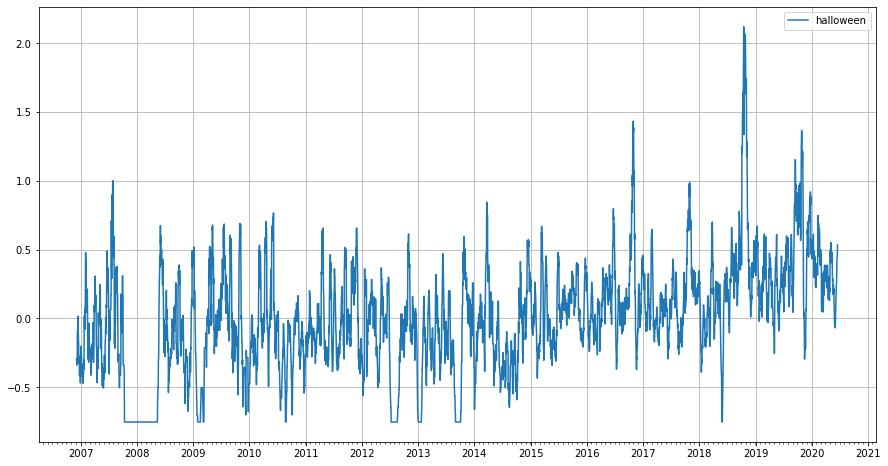

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
import matplotlib.dates as mdate
fig.set_size_inches(15,8)
ax.xaxis_date()
locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.grid(which='major')
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(12))
plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)

#plt.plot(df_perc_avg['timestamp'], df_perc_avg_s['christmas_ra'],label='christmas')
#plt.plot(df_perc_avg['timestamp'], df_perc_avg_s['horror_ra'],label='horror')
#plt.plot(df_perc_avg['timestamp'], df_perc_avg_s['action_ra'],label='action')
plt.plot(df_perc_avg['timestamp'], df_perc_avg_s['halloween_ra'],label='halloween')
#plt.plot(df_perc_avg['timestamp'], df_perc_avg_s['romance_ra'],label='romance')
#plt.plot(df_perc_avg['timestamp'], df_perc_avg_s['comedy_ra'],label='comedy')


plt.legend()
#plt.savefig('diff_avg_no_of_views(pg_view).pdf')